# Notebook 04: Medal Evolution Over Time

How have different user tiers performed over the years in terms of medal-winning? This section tracks the growth and trajectory of medals earned by tier.

In [1]:
%pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

DATA_DIR = Path("../data")
OUTPUT_DIR = Path("../outputs/Notebook 04")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

users_chunks = pd.read_csv(DATA_DIR / "Users.csv", chunksize=100000, low_memory=False, usecols=["Id", "PerformanceTier"])
users = pd.concat(users_chunks, ignore_index=True).rename(columns={"Id": "UserId"})

kernels = pd.read_csv(DATA_DIR / "Kernels.csv", low_memory=False)
kernels = kernels.rename(columns={"Id": "KernelId", "AuthorUserId": "UserId"})

kernels = kernels.merge(users[["UserId", "PerformanceTier"]], on="UserId", how="left")

kernels["Year"] = pd.to_datetime(kernels["CreationDate"], errors="coerce").dt.year


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Medals by Tier and Year

This plot shows how different performance tiers have contributed to medal-winning kernels each year.

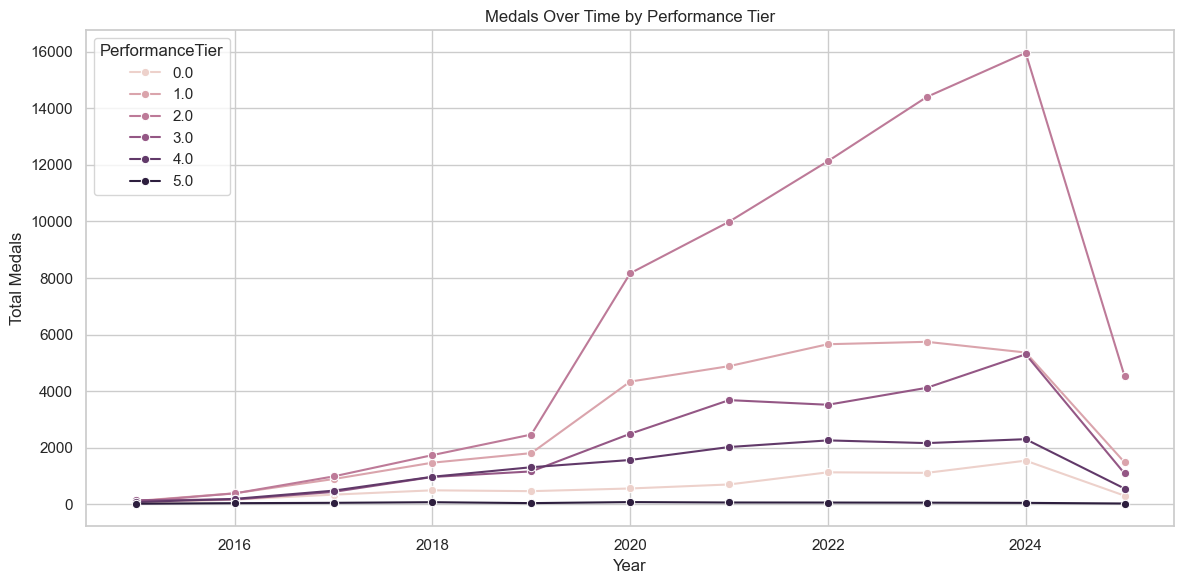

In [2]:
medal_kernels = kernels[kernels["Medal"].notna()]

medals_by_year_tier = (
    medal_kernels.groupby(["Year", "PerformanceTier"])
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=medals_by_year_tier, x="Year", y="Count", hue="PerformanceTier", marker="o")
plt.title("Medals Over Time by Performance Tier")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "medals_by_year_tier.png", dpi=300)
plt.show()

## Median Medals per User by Tier

Are higher-tier users just more frequent medalists? Let’s compare the median number of medals earned per user by tier.

C:\Users\Priyanshu Biswas\AppData\Local\Temp\ipykernel_20824\2635893968.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medal_dist, x="PerformanceTier", y="MedianMedals", palette="muted")


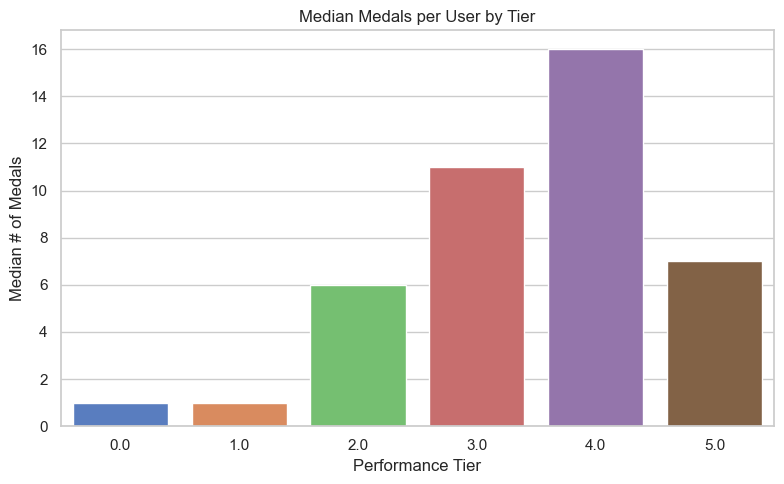

In [3]:
medals_per_user = (
    medal_kernels.groupby("UserId")
    .agg({"Medal": "count", "PerformanceTier": "first"})
    .reset_index()
)

medal_dist = (
    medals_per_user.groupby("PerformanceTier")["Medal"]
    .median()
    .reset_index(name="MedianMedals")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=medal_dist, x="PerformanceTier", y="MedianMedals", palette="muted")
plt.title("Median Medals per User by Tier")
plt.ylabel("Median # of Medals")
plt.xlabel("Performance Tier")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "median_medals_per_tier.png", dpi=300)
plt.show()

## Time Lag from First Kernel to First Medal

How quickly do users earn their first medal after they start writing kernels? We analyze the time lag between their first-ever kernel and their first medal-winning one.

C:\Users\Priyanshu Biswas\AppData\Local\Temp\ipykernel_20824\535395704.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=lag_df, x="PerformanceTier", y="Lag", palette="pastel")


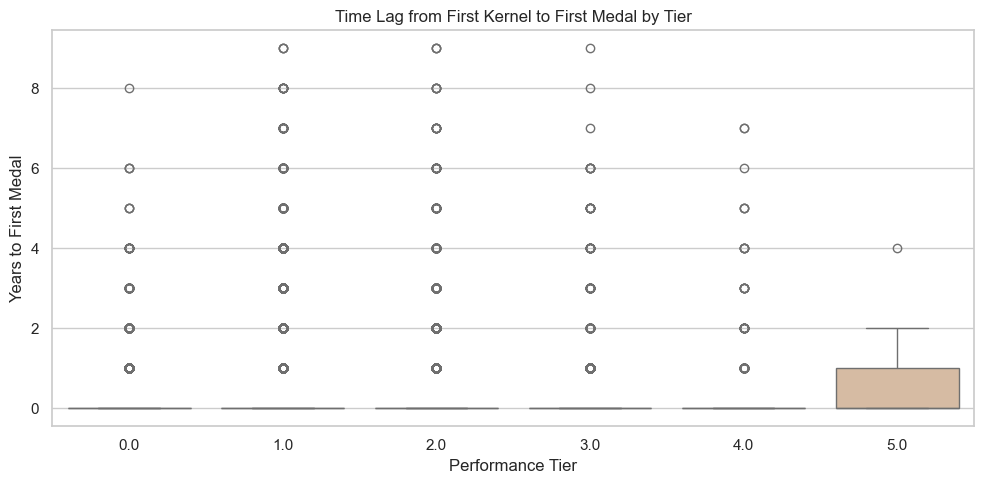

In [4]:
first_kernels = kernels.groupby("UserId")["Year"].min().reset_index(name="FirstKernelYear")
first_medals = medal_kernels.groupby("UserId")["Year"].min().reset_index(name="FirstMedalYear")

lag_df = first_kernels.merge(first_medals, on="UserId", how="inner")
lag_df["Lag"] = lag_df["FirstMedalYear"] - lag_df["FirstKernelYear"]

lag_df = lag_df.merge(users[["UserId", "PerformanceTier"]], on="UserId", how="left")

plt.figure(figsize=(10, 5))
sns.boxplot(data=lag_df, x="PerformanceTier", y="Lag", palette="pastel")
plt.title("Time Lag from First Kernel to First Medal by Tier")
plt.ylabel("Years to First Medal")
plt.xlabel("Performance Tier")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "first_medal_lag.png", dpi=300)
plt.show()

## Takeaways:

- Higher-tier users earn significantly more medals over time.
- Experts and Grandmasters win their first medals sooner, indicating sharper growth trajectories.
- Novice and Contributor-level users take longer to earn recognition, if at all.

In the next notebook, we’ll examine what *structural traits* define successful kernels — like markdown usage, code length, and interactivity.

Next: `05_kernel_structure_analysis.ipynb`